# **ALLAH**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# df = pd.read_csv("https://raw.githubusercontent.com/beccadsouza/Machine-Learning-Python/master/Datasets/height-weight.csv")
# df.to_csv("weight.csv",index = False)

In [79]:
df = pd.read_csv("weight.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [43]:
df.describe()
# The mean of the weight column is found to 
# be 161.44 and the standard deviation to be
#  32.108. The min and max values present in 
# the column are 64 and 269 respectively. Now
#  we will use 3 standard deviations and everything
# lying away from this will be treated as an outlier.
#  We will see an upper limit and lower limit using 3 
# standard deviations. Every data point that lies beyond the upper
#  limit and lower limit will be an outlier. Use the below code for the same. 

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


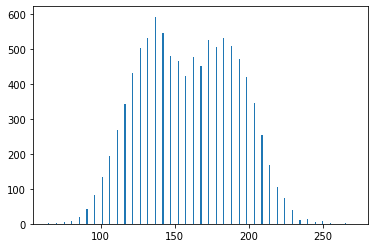

In [58]:
plt.hist(df.Weight,bins=40,width= 0.8)
plt.show()

In [53]:
upper = df.Weight.mean() + 3 * df.Weight.std()
upper

257.76567385238957

In [55]:
lower = df.Weight.mean() - 3 * df.Weight.std()
lower

65.11503981327198

In [59]:
df.shape

(10000, 3)

In [62]:
new_df= df[(df.Weight<upper) & (df.Weight>lower)]
new_df.shape

(9998, 3)

In [66]:
df['zscore'] = ( df.Weight - df.Weight.mean() ) / df.Weight.std()

In [67]:
df.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,2.505672
1,Male,68.781904,162.310473,0.027099
2,Male,74.110105,212.740856,1.597726
3,Male,71.730978,220.042470,1.825131
4,Male,69.881796,206.349801,1.398680


In [68]:
df[df['zscore']>3]

,Gender,Height,Weight,zscore
2014,Male,78.998742,269.989699,3.380711


In [70]:
df[df['zscore']<-3]

,Gender,Height,Weight,zscore
9285,Female,54.263133,64.700127,-3.012922


In [71]:
df_new = df[(df.zscore>-3) & (df.zscore<3)]

In [74]:
df_new.shape

(9998, 4)

In [81]:
import scipy.stats as stats
df = df.select_dtypes(include = 'number').apply(stats.zscore)
df.head(10)

,Height,Weight
0,1.944061,2.505797
1,0.627537,0.027101
2,2.012443,1.597806
3,1.394060,1.825222
4,0.913421,1.398750
5,0.230148,-0.287422
6,0.628362,0.700397
7,0.514890,0.203407
8,0.169309,0.451277
9,-0.756645,-0.156997
